<a href="https://colab.research.google.com/github/EddieCrispo/BK-Data-Science/blob/main/BK_Hungarian_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease

1. [Pengumpulan Data](#pengumpulan_data)

2. [Menelaah Data](#menelaah_data)
3. [Validasi Data](#validasi_data)
4. [Menentukan Objek Data](#objek_data)
5. [Membersihkan Data](#membersihkan_data)
6. [Konstruksi Data](#konstruksi_data)
7. [Modelling](#modelling)
8. [Evaluasi](#evaluasi)
9. [Streamlit](#streamlit)
10. [Kesimpulan](#kesimpulan)

<a name="pengumpulan_data"></a>
# 1. Pengumpulan Data

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data" diharapkan sebelum memakai dataset tersebut anda dapat membaca
deskripsi dataset yang ada di dalam file "heart-disease.names"


## Pip codes (Opsional)

Downgrade Versi Python dari 3.10 ke 3.9 untuk eksport model

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!sudo apt-get install python3.9

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support
  python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support python3.9
  python3.9-minimal
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 5,279 kB of archives.
After this operation, 19.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.18-1+jammy1 [835 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minima

In [ ]:
!python --version

Python 3.9.18


In [ ]:
!pip install imblearn

In [264]:
import sklearn
print(sklearn.__version__)
import pandas
print(pandas.__version__)
import numpy
print(numpy.__version__)

1.2.2
1.5.3
1.23.5


<a name="menelaah_data"></a>
# 2. Menelaah Data

Import library yang dibutuhkan

In [8]:
import pandas as pd
import numpy as np
import itertools
import re

Import dataset dari Google Drive dan buka dataset untuk memvalidasi

In [9]:
# Mount folder Google Drive ke Colab
from google.colab import drive
drive.mount('/content/drive')

# Masukkan path dataset kedalam variabel dir
dir = '/content/drive/MyDrive/BK/dataset/hungarian.data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Buat iterasi untuk membaca dataset

In [10]:
# Membuka file dengan path yang disimpan dalam variabel 'dir' dan menggunakan encoding 'Latin1' untuk membaca isi file
with open (dir, encoding='Latin1') as file:
  # Membaca setiap baris dari file dan menghapus spasi kosong di awal dan akhir baris
  # Kemudian, hasilnya disimpan dalam list 'lines'
  lines = [line.strip() for line in file]

# Menampilkan 10 baris pertama dari list 'lines'
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

Setelah membaca file dataset lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat
dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya


In [11]:
# Menggunakan modul itertools untuk mengambil elemen-elemen dari 'lines' yang memiliki panjang 76 karakter berturut-turut
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range (0, len(lines), 10))
)

# Membentuk DataFrame menggunakan pandas dari hasil iterasi 'data'
df = pd.DataFrame.from_records(data)

# Menampilkan lima baris pertama dari DataFrame 'df'
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


Gunakan metode `info()` dari pandas DataFrame untuk memberikan informasi ringkas tentang DataFrame, termasuk jumlah baris dan kolom, tipe data setiap kolom, serta jumlah nilai non-null dan penggunaan memori. Informasi ini sangat berguna untuk memahami struktur dan karakteristik data yang terdapat dalam DataFrame.

In [12]:
# Menampilkan informasi umum tentang DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau
string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0


In [13]:
# Memotong DataFrame 'df' untuk mengambil semua baris dan semua kolom kecuali kolom terakhir
df = df.iloc[:,:-1]

# Menghapus kolom pertama dari DataFrame 'df'
df = df.drop(df.columns[0], axis=1)

Ubah tipe file dataset menjadi tipe data Float sesuai dengan nilai null yaitu -9.0

In [14]:
# Mengubah tipe data semua kolom dalam DataFrame 'df' menjadi float
df = df.astype(float)

# Menampilkan informasi umum tentang DataFrame 'df' setelah transformasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

<a name="validasi_data"></a>
# 3. Validasi Data

Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya
mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset


In [169]:
# Mengganti nilai -9.0 dengan NaN\Null dalam DataFrame 'df' secara inplace
df.replace(-9.0, np.nan, inplace=True)

Menghitung jumlah nilai null value

In [170]:
# Menghitung jumlah nilai NaN dalam setiap kolom DataFrame 'df'
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [171]:
# Menampilkan lima baris pertama dari DataFrame 'df'
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [172]:
# Menampilkan informasi umum tentang DataFrame 'df' setelah transformasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

<a name="objek_data"></a>
# 4. Menentukan Objek Data

Pilih 14 fitur yang akan digunakan sesuai deskripsi dataset

14 Fitur yang digunakan yaitu:
1. #3  (age)       
2. #4  (sex)       
3. #9  (cp)        
4. #10 (trestbps)  
5. #12 (chol)      
6. #16 (fbs)       
7. #19 (restecg)   
8. #32 (thalach)   
9. #38 (exang)     
10. #40 (oldpeak)   
11. #41 (slope)     
12. #44 (ca)        
13. #51 (thal)      
14. #58 (num)

In [173]:
# Memilih subset kolom tertentu dari DataFrame 'df' menggunakan indeks kolom yang diberikan
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [174]:
# Tampilkan data teratas
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [175]:
# Menampilkan informasi umum tentang DataFrame 'df_selected'
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Mengganti nama kolom sesuai dengan 14 nama kolom yang ada di deskripsi dataset

In [176]:
# Membuat peta kolom baru yang mencocokkan indeks kolom dengan nama kolom yang diinginkan
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

# Mengganti nama kolom DataFrame 'df_selected' sesuai dengan peta yang telah dibuat
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-176-cc5329648a1e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [177]:
# Menampilkan informasi umum tentang DataFrame 'df_selected' setelah transformasi
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Hitung jumlah fitur pada dataset

In [178]:
# Menghitung frekuensi nilai unik untuk setiap kombinasi nilai dalam DataFrame 'df_selected'
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

<a name="membersihkan_data"></a>
# 5. Membersihkan Data

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat
menghitung jumlah null values yang ada di dalam dataset

In [179]:
# Menghitung jumlah null values yang ada di dalam dataset
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan output kode program diatas ada beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan
penghapusan fitur menggunakan fungsi drop

In [180]:
# Menentukan kolom-kolom yang akan dihapus dari DataFrame 'df_selected'
columns_to_drop = ['ca', 'slope','thal']

# Menghapus kolom-kolom yang telah ditentukan dari DataFrame 'df_selected'
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [181]:
# Menghitung jumlah nilai NaN/Null untuk setiap kolom dalam DataFrame 'df_selected'
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [182]:
# Menghitung mean dari kolom 'trestbps' setelah menghapus nilai NaN/Null
meanTBPS = df_selected['trestbps'].dropna()
# Menghitung mean dari kolom 'chol' setelah menghapus nilai NaN/Null
meanChol = df_selected['chol'].dropna()
# Menghitung mean dari kolom 'fbs' setelah menghapus nilai NaN/Null
meanfbs = df_selected['fbs'].dropna()
# Menghitung mean dari kolom 'restecg' setelah menghapus nilai NaN/Null
meanRestCG = df_selected['restecg'].dropna()
# Menghitung mean dari kolom 'thalach' setelah menghapus nilai NaN/Null
meanthalach = df_selected['thalach'].dropna()
# Menghitung mean dari kolom 'exang' setelah menghapus nilai NaN/Null
meanexang = df_selected['exang'].dropna()

In [183]:
# Mengubah Tipe Data menjadi float
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [184]:
# Menghitung mean (rata-rata), dan membulatkannya
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

Mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [185]:
# Menentukan nilai pengganti untuk mengisi nilai NaN/Null dalam kolom-kolom tertentu
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}

# Mengisi nilai NaN dalam DataFrame 'df_selected' dengan nilai pengganti yang telah ditentukan dan dimasukkan ke DataFrame 'dfClean'
dfClean = df_selected.fillna(value=fill_values)

In [186]:
# Menampilkan informasi umum tentang DataFrame 'dfClean' setelah pengisian nilai NaN
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [187]:
# Cek jumlah nilai null
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Pengecekan duplikasi data

In [188]:
# Mengidentifikasi baris-baris yang merupakan duplikat dalam DataFrame 'dfClean'
duplicate_rows = dfClean.duplicated()

# Menampilkan baris-baris yang merupakan duplikat dalam DataFrame 'dfClean'
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [189]:
# Menampilkan semua baris yang merupakan duplikat (tanpa mempertahankan satu dari duplikat)
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Hapus data yang memiliki duplikat

In [190]:
# Menghapus data yang memiliki duplikat
dfClean = dfClean.drop_duplicates()

# Pengecekan data yang memiliki duplikat
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [191]:
# Tampilkan 5 baris pertaman dari DataFrame 'dfClean'
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [192]:
# Menghitung frekuensi nilai unik dalam kolom 'target' dalam DataFrame 'dfClean'
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Import Seaborn dan matplotlib.pyplot

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

Menghitung matriks korelasi antar kolom-kolom (fitur) dalam DataFrame 'dfClean' menggunakan metode `corr()` lalu menyimpan matriks korelasi dalam variabel 'correlation_matrix'.

In [194]:
# Menghitung korelasi antar kolom-kolom dalam DataFrame 'dfClean'
correlation_matrix = dfClean.corr()

# Tampilkan matrix korelasi
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


Membuat plot heatmap dari matriks korelasi menggunakan seaborn (`sns`) dan matplotlib (`plt`). Parameter seperti `annot=True` menunjukkan untuk menampilkan nilai korelasi di dalam sel-sel heatmap, dan `fmt=".3f"` menunjukkan format tiga desimal untuk nilai-nilai tersebut.

<Axes: >

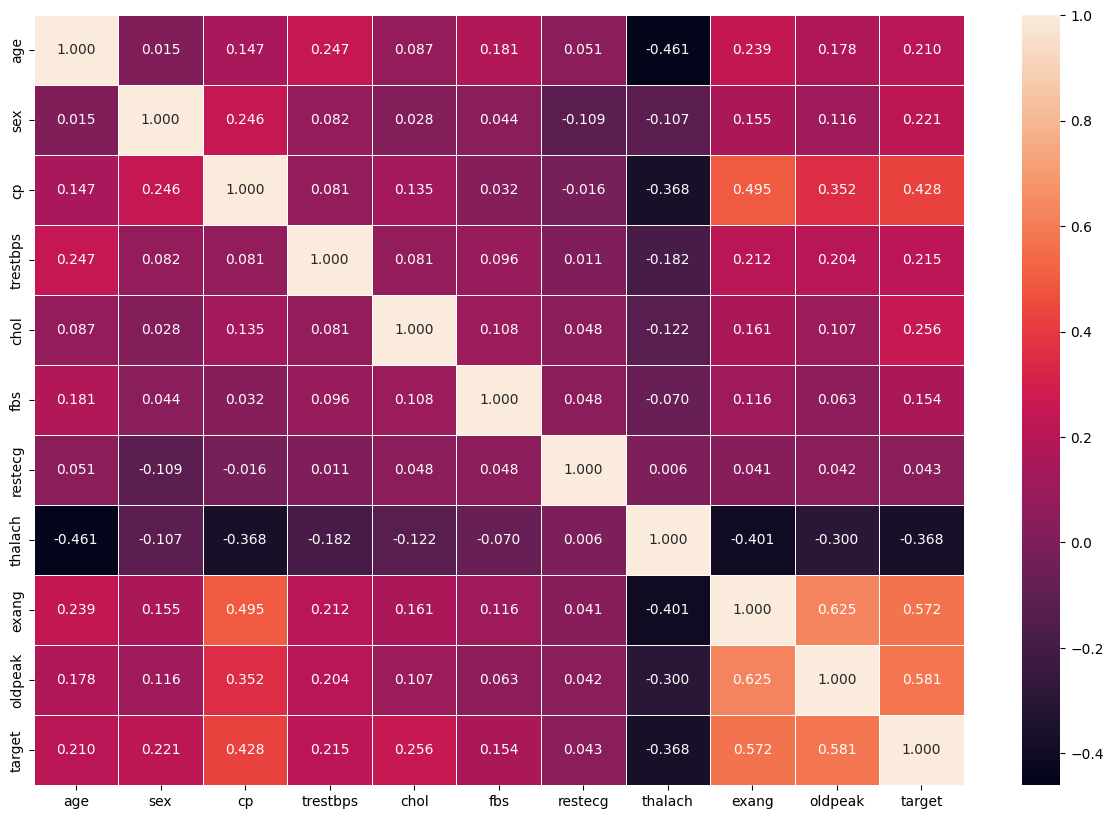

In [195]:
# Menampilkan matriks korelasi dalam bentuk heatmap menggunakan seaborn dan matplotlib
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".3f")

<a name="konstruksi_data"></a>
# 6. Konstruksi Data

Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada
tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [196]:
# Menampilkan informasi umum tentang DataFrame 'dfClean'
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [197]:
# Tampilkan 5 baris pertaman dari DataFrame 'dfClean'
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah menyesuaikan tipe dataset, kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel.

In [198]:
# Membuat variabel X yang berisi nilai-nilai dari semua kolom kecuali kolom 'target'
X = dfClean.drop("target", axis=1).values

# Membuat variabel y yang berisi nilai dari kolom 'target'
y = dfClean.iloc[:, -1]

Setelah memisahkan antara fitur dan target, sebaiknya kita melakukan pengecekan terlebih dahulu terhadap persebaran jumlah target terlebih dahulu.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

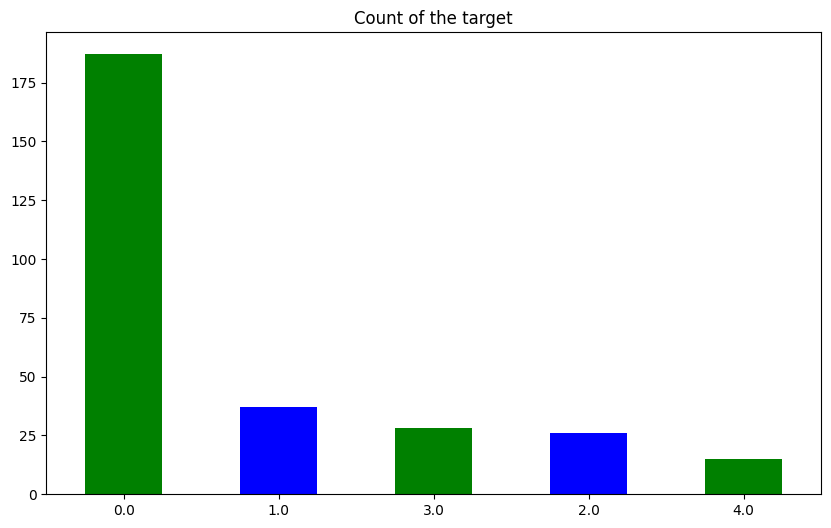

In [199]:
# Menghitung frekuensi nilai unik dalam kolom 'target' dan membuat plot bar
dfClean['target'].value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue'])

# Menambahkan judul pada plot
plt.title("Count of the target")

# Mengatur label sumbu x agar tidak miring
plt.xticks(rotation=0)

Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu.
Menyeimbangkan target ada 2 cara yaitu Oversampling dan Undersampling. Oversampling dilakukan jika jumlah dataset sedikit sedangkan
Undersampling dilakukan jika jumlah data terlalu banyak.


Disini kita akan melakukan Oversampling dikarenakan jumlah data kita tidak banyak. Salah satu metode yang Oversampling yang akan kita
gunakan adalah SMOTE

In [200]:
from imblearn.over_sampling import SMOTE

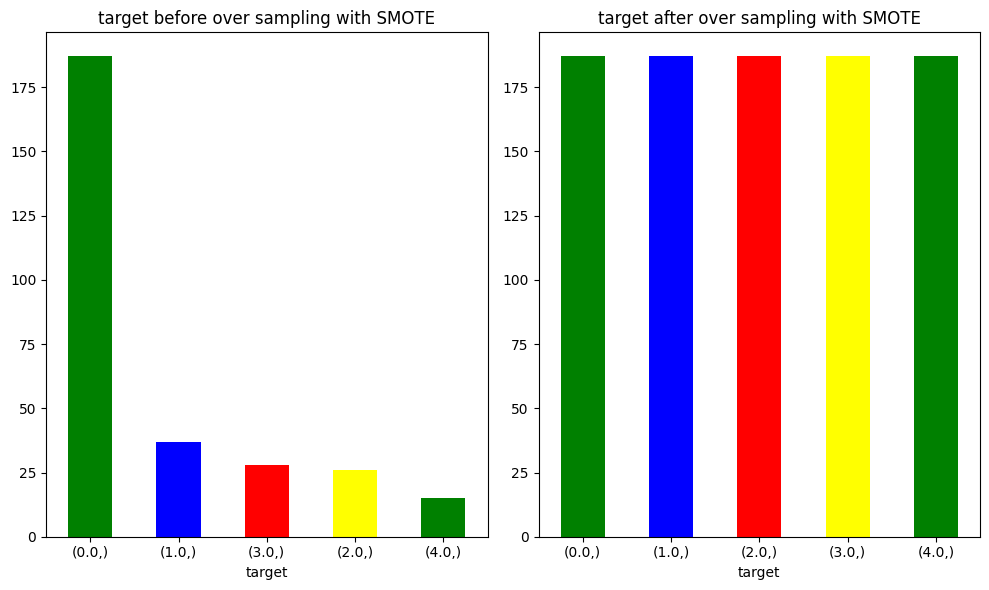

In [201]:
# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

# Membuat subplot untuk menampilkan dua grafik secara bersamaan
plt.figure(figsize=(12, 4))

# Plot grafik sebelum oversampling dengan SMOTE
plt.subplot(1, 2, 1)
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0)

# Plot grafik setelah oversampling dengan SMOTE
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0)

# Menata layout subplot agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Pada Grafik diatas dapat dilihat ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling.


In [202]:
# Membuat DataFrame baru dari data 'y' dan menghitung frekuensi nilai unik
new_df1 = pd.DataFrame(data=y)
value_counts_before_oversampling = new_df1.value_counts()

# Menampilkan frekuensi nilai unik sebelum oversampling
print("Before Oversampling:")
print(value_counts_before_oversampling)

Before Oversampling:
target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64


In [203]:
# Membuat DataFrame baru dari data 'y_smote_resampled' dan menghitung frekuensi nilai unik
new_df2 = pd.DataFrame(data=y_smote_resampled)
value_counts_after_oversampling = new_df2.value_counts()

# Menampilkan frekuensi nilai unik setelah oversampling
print("After Oversampling:")
print(value_counts_after_oversampling)

After Oversampling:
target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64


Setelah menyeimbangkan persebaran jumlah target, kita akan melakukan mengecekan apakah perlu dilakukan normalisasi/standarisasi pada dataset.


Kode ini menggunakan metode `describe()` pada DataFrame 'dfClean' untuk menghasilkan ringkasan statistik deskriptif, termasuk jumlah, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum dari setiap kolom numerik dalam DataFrame.

In [204]:
# Menampilkan ringkasan statistik deskriptif dari DataFrame 'dfClean'
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.


In [205]:
# Mengimpor MinMaxScaler dari modul sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Menggunakan MinMaxScaler untuk melakukan normalisasi pada X_smote_resampled
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

# Menampilkan panjang (jumlah baris) dari hasil normalisasi
len(X_smote_resampled_normal)

935

In [206]:
# Membuat DataFrame baru 'dfcek1' dari hasil normalisasi X_smote_resampled_normal
dfcek1 = pd.DataFrame(X_smote_resampled_normal)

# Menampilkan ringkasan statistik deskriptif dari DataFrame 'dfcek1'
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

In [207]:
# Mengimpor fungsi train_test_split dari modul sklearn.model_selection
from sklearn.model_selection import train_test_split

# Membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# Membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

<a name="modelling"></a>
# 7. Modelling

Pada tahap ini kita akan memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.

In [208]:
# Mengimpor fungsi-fungsi evaluasi dari modul sklearn.metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Mendefinisikan fungsi evaluasi dengan parameter Y_test (kelas sebenarnya) dan Y_pred (kelas prediksi)
def evaluation(Y_test, Y_pred):
    # Menghitung nilai akurasi
    acc = accuracy_score(Y_test, Y_pred)

    # Menghitung nilai recall dengan menggunakan rata-rata tertimbang
    rcl = recall_score(Y_test, Y_pred, average='weighted')

    # Menghitung nilai F1 score dengan menggunakan rata-rata tertimbang
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    # Menghitung nilai precision dengan menggunakan rata-rata tertimbang
    ps = precision_score(Y_test, Y_pred, average='weighted')

    # Membuat dictionary yang berisi hasil evaluasi
    metric_dict = {
        'accuracy': round(acc, 3),
        'recall': round(rcl, 3),
        'F1 score': round(f1, 3),
        'Precision score': round(ps, 3)
    }

    # Menampilkan hasil evaluasi
    return print(metric_dict)

##Oversampling

### KNN

Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.


In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [210]:
# Membuat model K-Nearest Neighbors (KNN) dengan jumlah tetangga (n_neighbors) sebanyak 3
knn_model = KNeighborsClassifier(n_neighbors = 3)

# Melatih model KNN menggunakan data latih (X_train dan y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [211]:
# Menggunakan model KNN untuk membuat prediksi pada data uji (X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model KNN
print("K-Nearest Neighbors (KNN) Model:")

# Menghitung dan mencetak akurasi model KNN
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote)

# Mencetak laporan klasifikasi untuk model KNN
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [212]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model KNN
evaluation(y_test,y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya

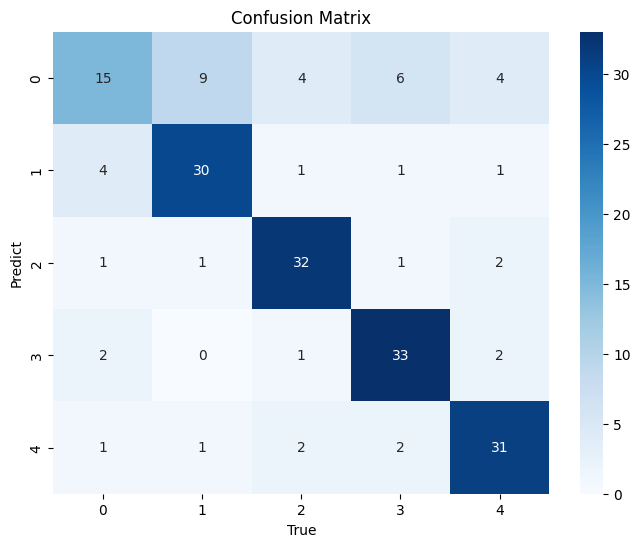

In [213]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test) dan prediksi (y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

###Random Forest

Selanjutnya kita akan membangun model dengan algoritma random forest dengan `n_estimators` yaitu 100, `n_estimators` sendiri berguna mengatur jumlah pohon keputusan yang akan dibangun

In [214]:
# Membuat model Random Forest dengan 100 pohon keputusan (n_estimators=100)
# dan menggunakan nilai seed acak (random_state=42) untuk hasil yang dapat direproduksi
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model Random Forest menggunakan data latih (X_train dan y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [215]:
# Menggunakan model Random Forest untuk membuat prediksi pada data uji (X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest
print("\nRandom Forest Model:")

# Menghitung dan mencetak akurasi model Random Forest
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote)

# Mencetak laporan klasifikasi untuk model Random Forest
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [216]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model Random Forest
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


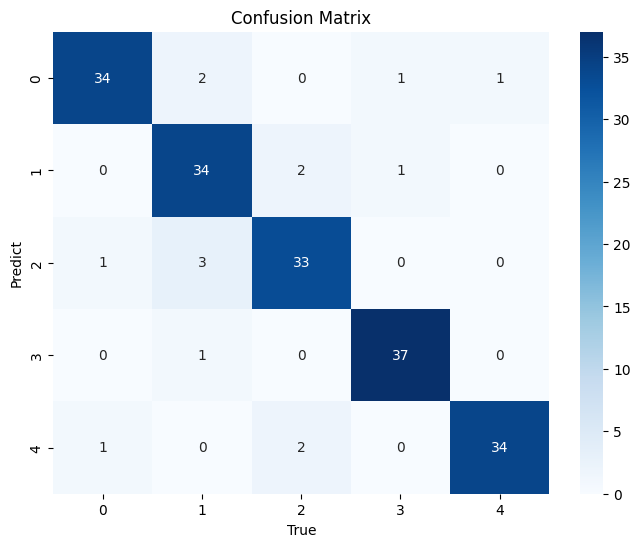

In [217]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test) dan prediksi (y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

###XGBoost

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu `0.1`. Learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.


In [218]:
# Membuat model XGBoost dengan learning rate 0.1, 100 pohon keputusan (n_estimators=100),
# dan menggunakan nilai seed acak (random_state=42) untuk hasil yang dapat direproduksi
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Melatih model XGBoost menggunakan data latih (X_train dan y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [219]:
# Menggunakan model XGBoost untuk membuat prediksi pada data uji (X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model XGBoost
print("\nXGBoost Model:")

# Menghitung dan mencetak akurasi model XGBoost
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote)

# Mencetak laporan klasifikasi untuk model XGBoost
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [220]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model XGBoost
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


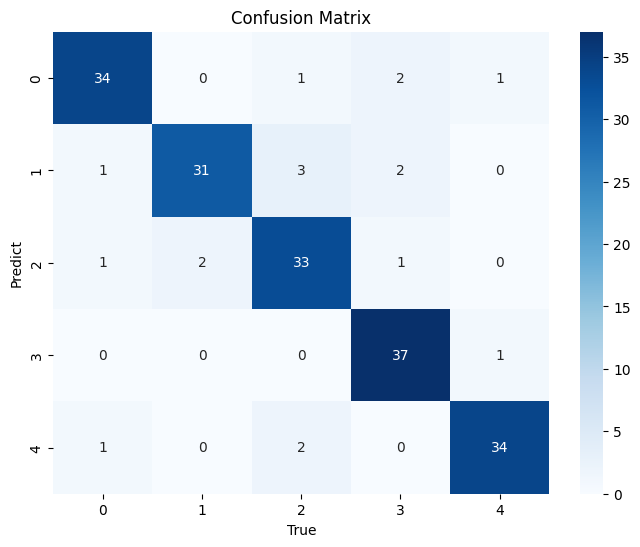

In [221]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test) dan prediksi (y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

##Oversampling + Normalisasi

Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi.
Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada
masing-masing model.


###KNN

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [223]:
# Membuat model K-Nearest Neighbors (KNN) dengan jumlah tetangga (n_neighbors) sebanyak 3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Melatih model KNN menggunakan data latih yang telah dinormalisasi (X_train_normal dan y_train_normal)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [224]:
# Menggunakan model KNN yang telah dilatih untuk membuat prediksi pada data uji yang telah dinormalisasi (X_test_normal)
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluasi model KNN yang telah dinormalisasi
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote_normal)

# Mencetak laporan klasifikasi untuk model KNN yang telah dinormalisasi
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [225]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model KNN pada data uji yang telah dinormalisasi
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


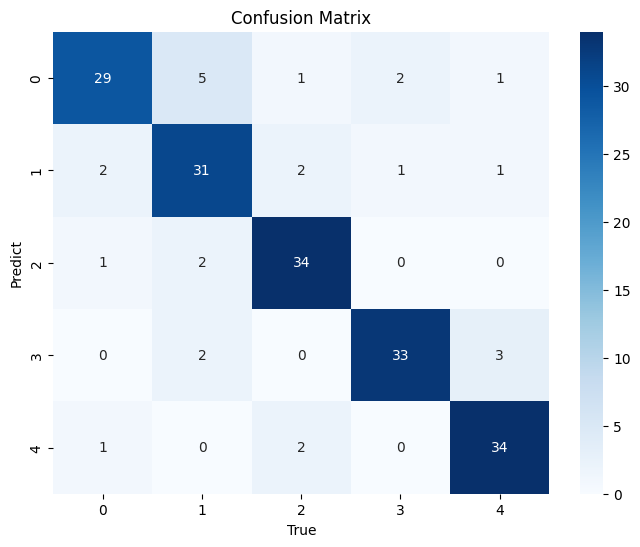

In [226]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test_normal) dan prediksi (y_pred_knn)
cm = confusion_matrix(y_test_normal, y_pred_knn)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

###Random Forest

In [227]:
# Membuat model Random Forest dengan 100 pohon keputusan (n_estimators=100)
# dan menggunakan nilai seed acak (random_state=42) untuk hasil yang dapat direproduksi
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model Random Forest menggunakan data latih yang telah dinormalisasi (X_train_normal dan y_train_normal)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [228]:
# Menggunakan model Random Forest yang telah dilatih untuk membuat prediksi pada data uji yang telah dinormalisasi (X_test_normal)
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluasi model Random Forest yang telah dinormalisasi
print("\nRandom Forest Model:")

# Menghitung dan mencetak akurasi model Random Forest
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote_normal)

# Mencetak laporan klasifikasi untuk model Random Forest yang telah dinormalisasi
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [229]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model Random Forest pada data uji yang telah dinormalisasi
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


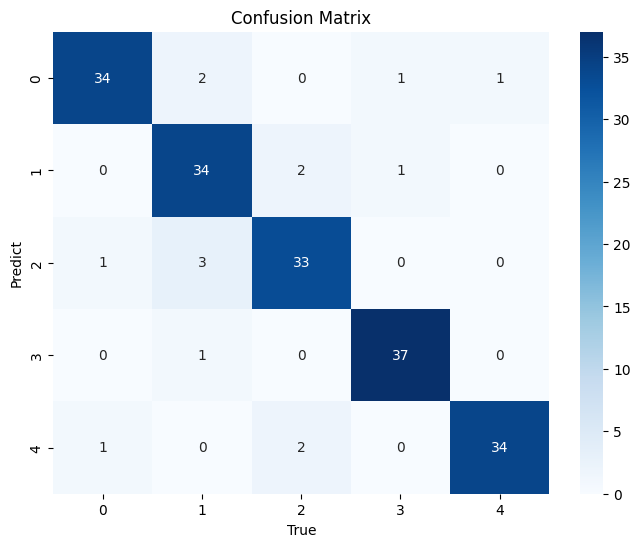

In [230]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test_normal) dan prediksi (y_pred_rf)
cm = confusion_matrix(y_test_normal, y_pred_rf)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

###XGBoost

In [231]:
# Membuat model XGBoost dengan learning rate 0.1, 100 pohon keputusan (n_estimators=100),
# dan menggunakan nilai seed acak (random_state=42) untuk hasil yang dapat direproduksi
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Melatih model XGBoost menggunakan data latih yang telah dinormalisasi (X_train_normal dan y_train_normal)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [232]:
# Menggunakan model XGBoost yang telah dilatih untuk membuat prediksi pada data uji yang telah dinormalisasi (X_test_normal)
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluasi model XGBoost yang telah dinormalisasi
print("\nXGBoost Model:")

# Menghitung dan mencetak akurasi model XGBoost
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote_normal)

# Mencetak laporan klasifikasi untuk model XGBoost yang telah dinormalisasi
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [233]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model XGBoost pada data uji yang telah dinormalisasi
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


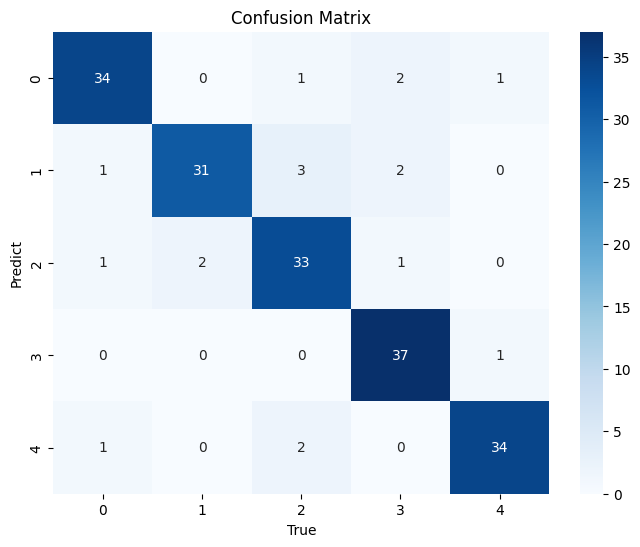

In [234]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test_normal) dan prediksi (y_pred_xgb)
cm = confusion_matrix(y_test_normal, y_pred_xgb)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

##Tuning + Normalization + Oversampling

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan
adalah data yang sudah dilakukan Tuning Parameter, Normalisasi, dan Oversample.

###KNN

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tuning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [236]:
# Menggunakan KNeighborsClassifier sebagai model KNN
knn_model_norm_ov_tun = KNeighborsClassifier()

# Menentukan ruang parameter untuk Randomized Search
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

# Menerapkan Randomized Search untuk mencari parameter terbaik
knn_model_norm_ov_tun = RandomizedSearchCV(estimator=knn_model_norm_ov_tun, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model_norm_ov_tun.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = knn_model_norm_ov_tun.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 56, 'algorithm': 'kd_tree'}


In [237]:
# Menggunakan model KNN dengan parameter terbaik untuk membuat prediksi pada data uji yang telah dinormalisasi (X_test_normal)
y_pred_knn = knn_model_norm_ov_tun.predict(X_test_normal)

# Evaluasi model KNN yang telah dioptimalkan
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [238]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model KNN yang telah dioptimalkan pada data uji yang telah dinormalisasi
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


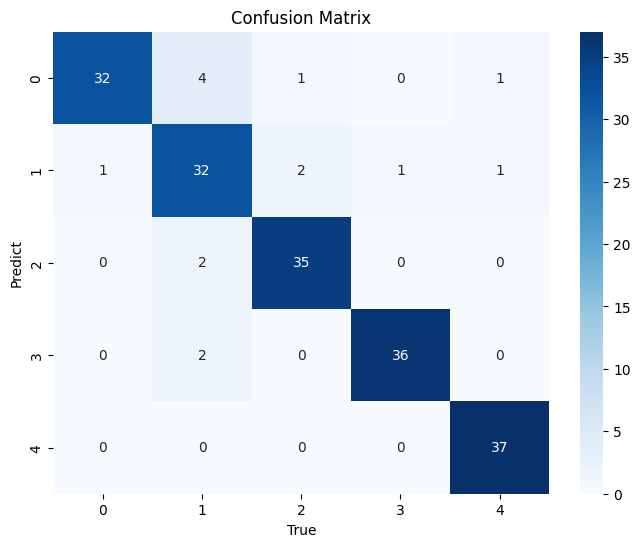

In [239]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test_normal) dan prediksi (y_pred_knn)
cm = confusion_matrix(y_test_normal, y_pred_knn)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

###Random Forest

Tuning Parameter

In [240]:
# Menggunakan RandomForestClassifier sebagai model Random Forest
rf_model_norm_ov_tun = RandomForestClassifier()

# Menentukan ruang parameter untuk Randomized Search
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

# Menerapkan Randomized Search untuk mencari parameter terbaik
rf_model_norm_ov_tun = RandomizedSearchCV(rf_model_norm_ov_tun, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model_norm_ov_tun.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = rf_model_norm_ov_tun.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [241]:
# Menggunakan model Random Forest yang telah dioptimalkan untuk membuat prediksi pada data uji yang telah dinormalisasi (X_test_normal)
y_pred_rf = rf_model_norm_ov_tun.predict(X_test_normal)

# Evaluasi model Random Forest yang telah dioptimalkan
print("\nRandom Forest Model:")

# Menghitung dan mencetak akurasi model Random Forest
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote_normal_Tun)

# Mencetak laporan klasifikasi untuk model Random Forest yang telah dioptimalkan
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.82      0.89      0.86        37
         2.0       0.89      0.86      0.88        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.95      0.96        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [242]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model Random Forest yang telah dioptimalkan pada data uji yang telah dinormalisasi
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.915, 'Precision score': 0.916}


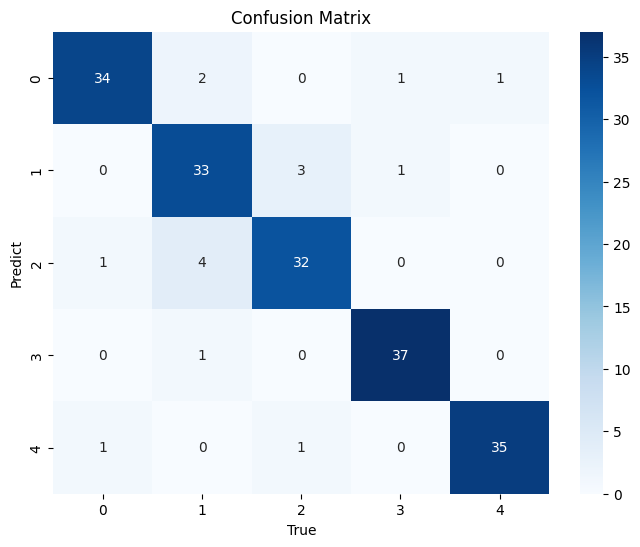

In [243]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test_normal) dan prediksi (y_pred_rf)
cm = confusion_matrix(y_test_normal, y_pred_rf)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

###XGBoost

Tuning Parameter

In [244]:
# Menggunakan XGBClassifier sebagai model XGBoost
xgb_model_norm_ov_tun = XGBClassifier()

# Menentukan ruang parameter untuk Randomized Search
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

# Menerapkan Randomized Search untuk mencari parameter terbaik
xgb_model_norm_ov_tun = RandomizedSearchCV(xgb_model_norm_ov_tun, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model_norm_ov_tun.fit(X_train_normal, y_train_normal)

# Mendapatkan parameter terbaik
best_params = xgb_model_norm_ov_tun.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [245]:
# Menggunakan model XGBoost yang telah dioptimalkan untuk membuat prediksi pada data uji yang telah dinormalisasi (X_test_normal)
y_pred_xgb = xgb_model_norm_ov_tun.predict(X_test_normal)

# Evaluasi model XGBoost yang telah dioptimalkan
print("\nXGBoost Model:")

# Menghitung dan mencetak akurasi model XGBoost
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote_normal_Tun)

# Mencetak laporan klasifikasi untuk model XGBoost yang telah dioptimalkan
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.86      0.81      0.83        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [246]:
# Menggunakan fungsi evaluasi untuk mengevaluasi model XGBoost yang telah dioptimalkan pada data uji yang telah dinormalisasi
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.903, 'Precision score': 0.904}


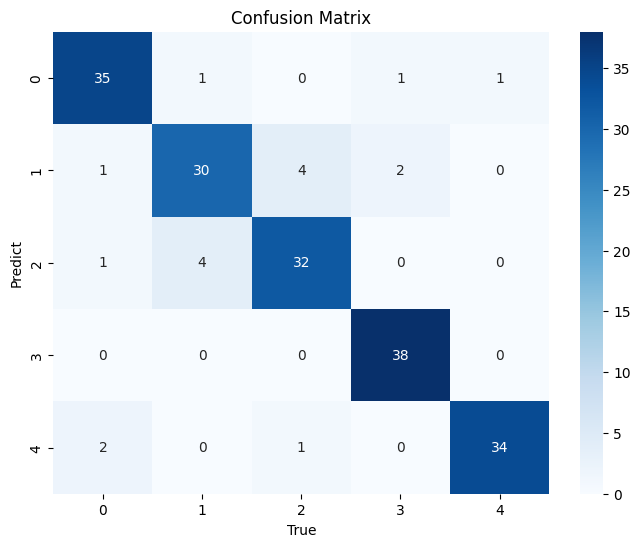

In [247]:
# Menghitung matriks kebingungan (confusion matrix) antara kelas sebenarnya (y_test_normal) dan prediksi (y_pred_xgb)
cm = confusion_matrix(y_test_normal, y_pred_xgb)

# Membuat plot heatmap untuk menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Menambahkan judul dan label pada plot heatmap
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')

# Menampilkan plot heatmap
plt.show()

<a name="evaluasi"></a>
# 8. Evaluasi

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

## Oversampling

Evaluasi data untuk algoritma yang menggunakan oversampling saja

In [248]:
import matplotlib.pyplot as plt

In [249]:
# Menggunakan modul matplotlib.pyplot untuk membuat plot perbandingan akurasi model
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
                            'Accuracy': [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]})

# Mencetak DataFrame yang berisi perbandingan akurasi model
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


Buat bar graph untuk melihat perbedaan akurasi tiap model algoritma

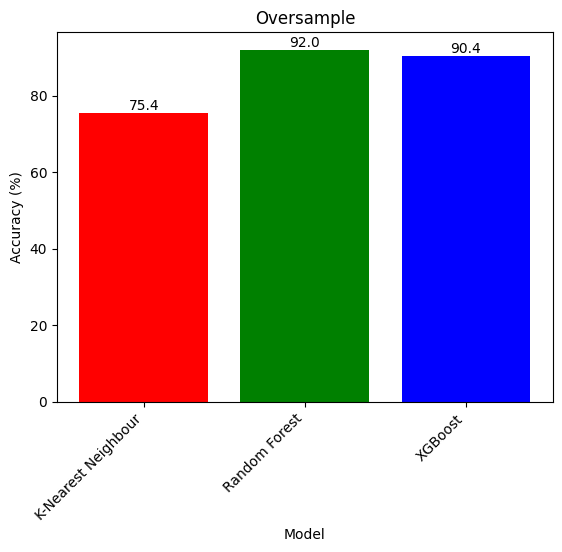

In [250]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()

# Membuat batang (bars) pada diagram batang dengan menggunakan data dari model_comp1 DataFrame
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])

# Menambahkan label pada sumbu x dan y, serta judul plot
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

## Oversampling + Normalisasi

Evaluasi data untuk algoritma yang menggunakan oversampling dan normalisasi

In [251]:
# Membuat DataFrame model_comp2 yang berisi perbandingan akurasi dari tiga model pada data uji yang telah dioversampling dan dinormalisasi
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
                            'Accuracy': [accuracy_knn_smote_normal*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal*100]})

# Mencetak lima baris pertama dari DataFrame model_comp2
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


Buat bar graph untuk melihat perbedaan akurasi tiap model algoritma

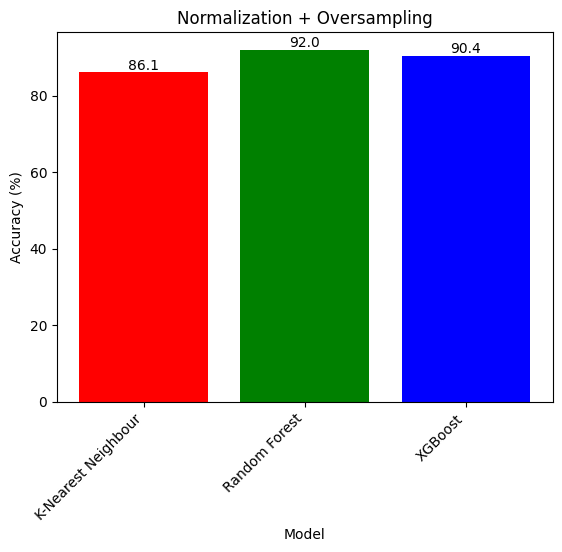

In [252]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()

# Membuat batang (bars) pada diagram batang dengan menggunakan data dari model_comp2 DataFrame
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])

# Menambahkan label pada sumbu x dan y, serta judul plot
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

## Oversampling + Normalisasi + Tuning

Evaluasi data untuk algoritma yang menggunakan oversampling, normalisasi, dan tuning parameter

In [253]:
# Membuat DataFrame model_comp3 yang berisi perbandingan akurasi dari tiga model pada data uji yang telah dioversampling, dinormalisasi, dan dituning
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal_Tun*100, accuracy_xgb_smote_normal_Tun*100]})

# Mencetak lima baris pertama dari DataFrame model_comp3
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,91.4
2,XGBoost,90.4


Buat bar graph untuk melihat perbedaan akurasi tiap model algoritma

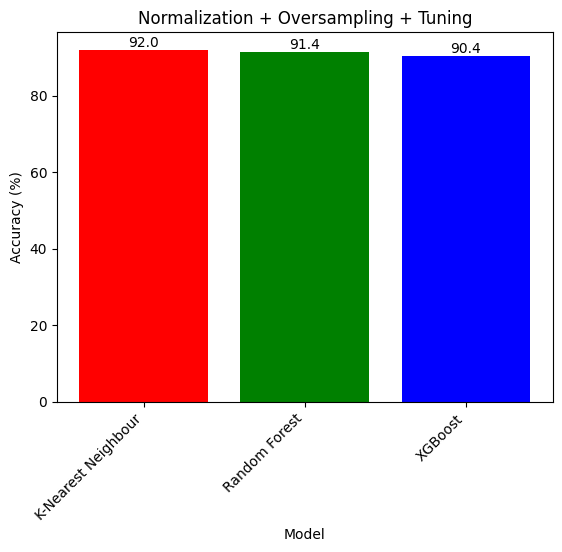

In [254]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()

# Membuat batang (bars) pada diagram batang dengan menggunakan data dari model_comp3 DataFrame
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])

# Menambahkan label pada sumbu x dan y, serta judul plot
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tuning')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

## Perbandingan model algoritma terbaik

In [255]:
# Membuat DataFrame model_compBest yang berisi perbandingan akurasi dari tiga model terbaik pada data uji
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour Oversample Tuning', 'Random Forest Oversample', 'XGB Oversample Normalization Tuning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal_Tun*100]
})

Buat bar graph untuk membandingkan model terbaik dari masing-masing algoritma

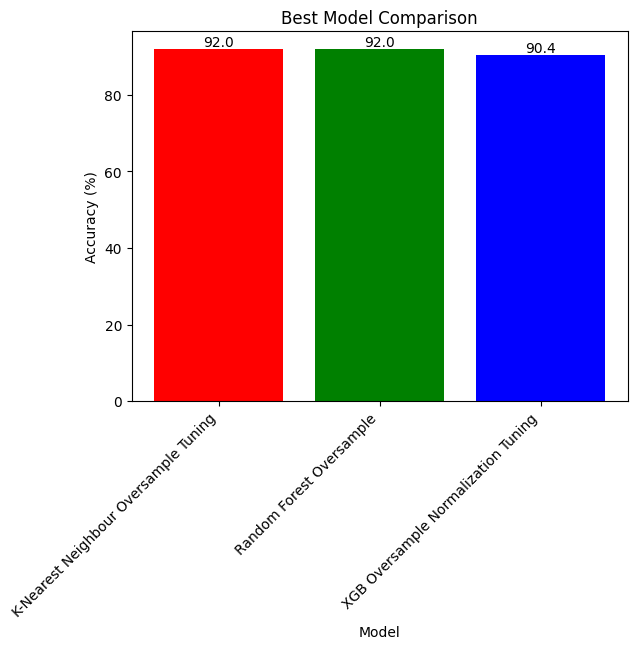

In [256]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()

# Membuat batang (bars) pada diagram batang dengan menggunakan data dari model_compBest DataFrame
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])

# Menambahkan label pada sumbu x dan y, serta judul plot
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

<a name="streamlit"></a>
# 9. Streamlit

Simpan model agar bisa dipakai untuk Streamlit

In [257]:
import joblib

# Menyimpan model sebagai file .pkl
# model_filename = 'knn_ovtuning_model.pkl'
model_filename = 'xgb_norm_ov_tun_model.pkl'
joblib.dump(xgb_model_norm_ov_tun, model_filename)

print(f'Model KNN terbaik telah disimpan sebagai {model_filename}')

Model KNN terbaik telah disimpan sebagai xgb_norm_ov_tun_model.pkl


In [258]:
import pickle

# Menyimpan model ke dalam file menggunakan pickle
with open("knn_norm_ov_tun_model.pkl", 'wb') as file:
    pickle.dump(knn_model_norm_ov_tun, file)

Link Streamlit : https://heart-disease-hungarian-eddiecrispo1.streamlit.app/

<a name="kesimpulan"></a>
# 10. Kesimpulan

Seperti yang terlihat dari evaluasi di atas, akurasi model dapat ditingkatkan dengan melakukan oversampling, terutama jika normalisasi juga dilakukan. Akurasi dapat meningkat lebih lanjut melalui tuning parameter. Meskipun beberapa model tidak mengalami perubahan atau bahkan mengalami penurunan akurasi setelah melakukan oversampling, normalisasi, dan tuning parameter, langkah-langkah tersebut dapat meningkatkan akurasi secara keseluruhan. Hasil evaluasi menunjukkan bahwa akurasi tertinggi dicapai oleh model KNN setelah menerapkan oversampling, normalisasi, dan tuning parameter. Oleh karena itu, model ini akan digunakan untuk deployment pada platform streamlit.